In [ ]:
import pandas as pd
path = "/content/titanic.csv"
df = pd.read_csv(path)
print(df.head())

# Check the summary statistics of numerical columns
print(df.describe())

# Check the data types and missing values
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values in Age (fill with median)
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Handle missing values in Embarked (fill with mode)
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# Handle missing values in Cabin (create a new feature indicating if Cabin information was missing)
df['Cabin_Null'] = df['Cabin'].isnull().astype(int)

# Drop unnecessary columns or features that might not contribute significantly
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Final check for any remaining missing values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_Null    0
dtype: int64


<ipython-input-7-5b92dfb5348f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='Set2')


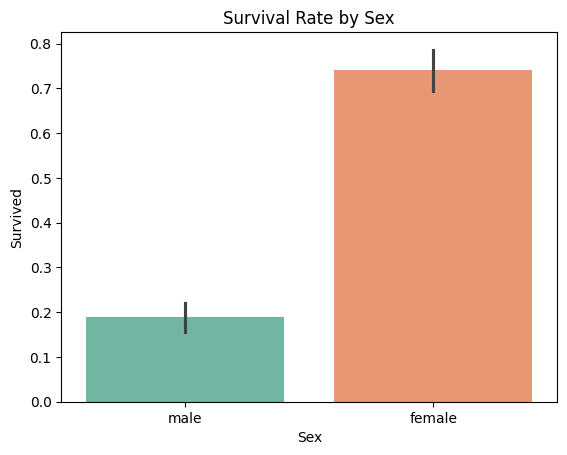

<ipython-input-7-5b92dfb5348f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')


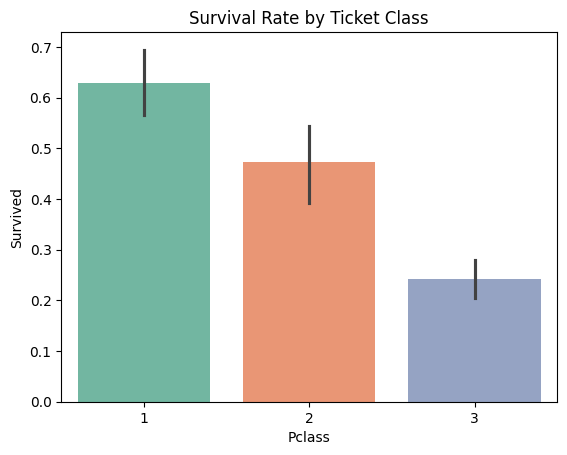

<ipython-input-7-5b92dfb5348f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='Set2')


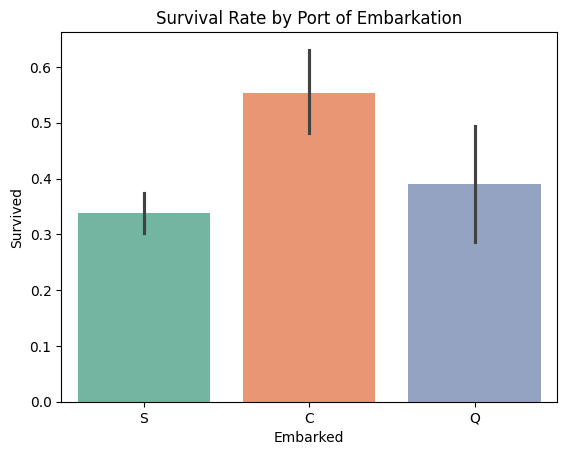

<ipython-input-7-5b92dfb5348f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette='Set2')


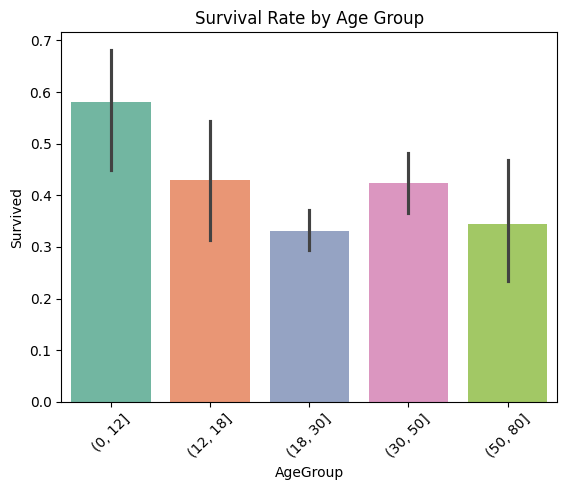

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival analysis by Sex
sns.barplot(x='Sex', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Sex')
plt.show()

# Survival analysis by Pclass (Ticket class)
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Ticket Class')
plt.show()

# Survival analysis by Embarked (Port of Embarkation)
sns.barplot(x='Embarked', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Port of Embarkation')
plt.show()

# Survival analysis by Age (using bins)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80])
sns.barplot(x='AgeGroup', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-5ac618c7876b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set3')


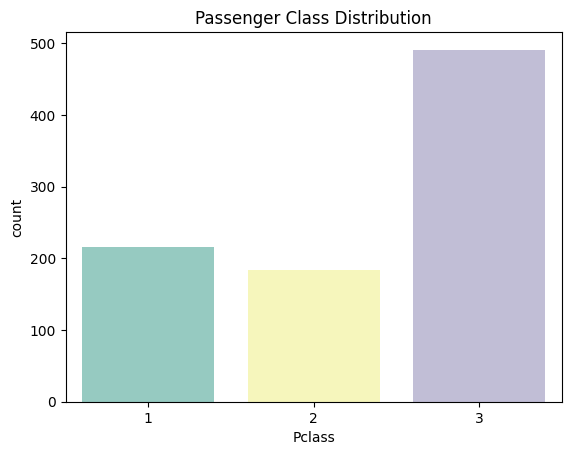

<ipython-input-8-5ac618c7876b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='Set3')


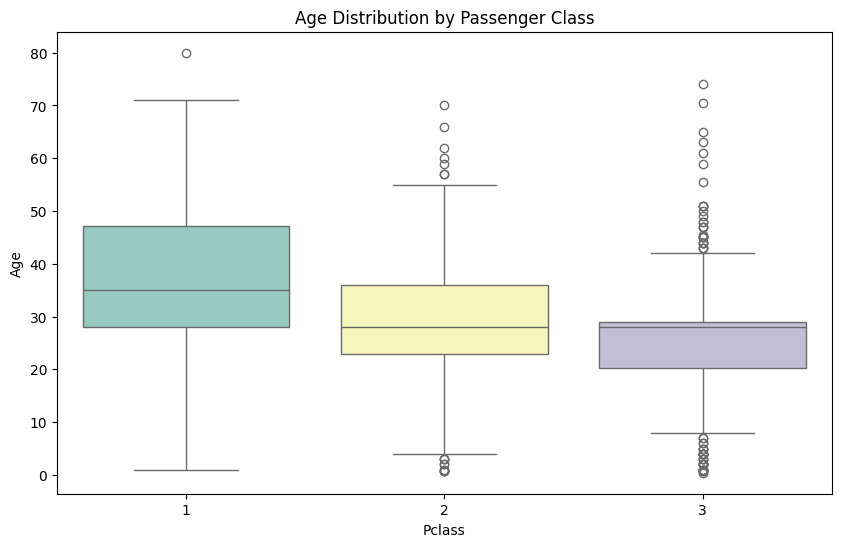

In [ ]:
# Distribution of passengers by Pclass
sns.countplot(x='Pclass', data=df, palette='Set3')
plt.title('Passenger Class Distribution')
plt.show()

# Passenger class distribution by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Passenger Class')
plt.show()
